In [3]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

audio_file_path='datasets/drinking_2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data)

[ 3.9842995e-04  9.6722004e-05  8.3976710e-04 ... -1.3657064e-03
 -1.8422189e-03  0.0000000e+00]


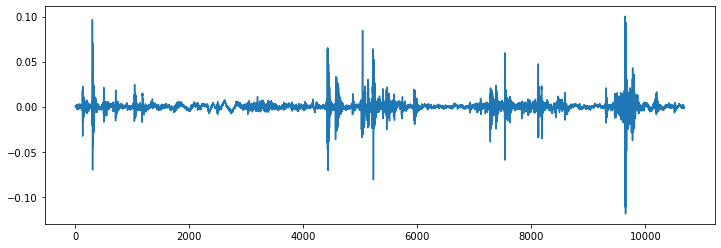

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [7]:
wave_audio

array([[  58,   -8],
       [   1,   -6],
       [   5,   15],
       ...,
       [ -10, -109],
       [  43, -105],
       [  36, -101]], dtype=int16)

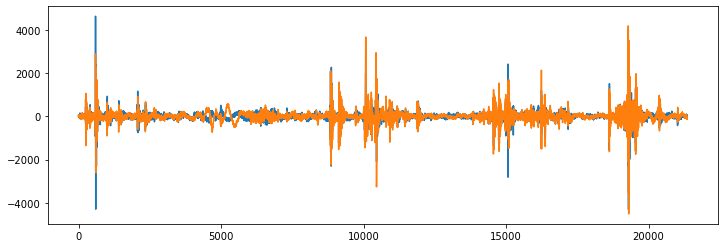

In [8]:
import matplotlib.pyplot as plt

# Original audio in stereo
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [59]:
# MFCC Extraction begin here 
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 435)


In [10]:
mfccs

array([[-3.36948334e+02, -3.09772766e+02, -3.51633453e+02,
        -3.95735138e+02, -4.26329132e+02, -4.16935181e+02,
        -3.91037994e+02, -3.96246857e+02, -3.46642792e+02,
        -2.70388611e+02, -2.59924072e+02, -2.96747864e+02,
        -3.94313110e+02, -4.03914886e+02, -3.29968506e+02,
        -2.97518921e+02, -3.01844116e+02, -3.50153442e+02,
        -2.95842224e+02, -2.56269440e+02, -3.24376678e+02],
       [-2.77668552e+01, -1.56258669e+01,  1.81101151e+01,
         4.08536606e+01,  5.45735550e+01,  4.99994926e+01,
         2.62772064e+01,  2.31380005e+01,  1.52458916e+01,
         6.65335388e+01,  1.10461258e+02,  1.03173096e+02,
         6.13016434e+01,  3.96889992e+01, -3.25895977e+00,
         7.59910297e+00,  5.07577324e+01,  4.80663605e+01,
        -1.08920326e+01, -1.57424669e+01, -3.06812215e+00],
       [-3.03922729e+01, -2.60005379e+01, -2.55652695e+01,
        -1.85084114e+01,  1.22776222e+01,  1.94835663e+01,
         1.12189102e+01,  1.51349068e+01, -1.11252613e

In [61]:
audio_dataset_path='datasets'
metadata=pd.read_csv('metadata.csv')
metadata.head(50)

,file_name,classID,class
0,drinking_1,1,drinking
1,drinking_2,1,drinking
2,drinking_3,1,drinking
3,drinking_4,1,drinking
4,drinking_5,1,drinking
5,drinking_6,1,drinking
6,drinking_7,1,drinking
7,drinking_8,1,drinking
8,drinking_9,1,drinking
9,drinking_10,1,drinking


In [58]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [13]:
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    print(file_name)

30it [00:00, 5015.11it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_1
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_2
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_3
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_4
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_5
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_6
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_7
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_8
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_9
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_10
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_11
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_12
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\a

In [63]:
# Loop for extracting
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"])+'.wav')
    print(file_name)
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5it [00:00, 30.20it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_1.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_2.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_3.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_4.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_5.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_6.wav


9it [00:00, 18.33it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_7.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_8.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_9.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_10.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_11.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_12.wav


14it [00:00, 15.11it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_13.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_14.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_15.wav


18it [00:01, 15.75it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_16.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_17.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_18.wav


20it [00:01, 14.41it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_19.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_20.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_21.wav


22it [00:01, 13.90it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_22.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_1.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_2.wav


24it [00:01, 11.55it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_3.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_4.wav


26it [00:01, 10.12it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_5.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_6.wav


28it [00:02,  9.34it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_7.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_8.wav


31it [00:02,  7.52it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_9.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_10.wav


33it [00:02,  8.03it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_11.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_12.wav


35it [00:03,  7.94it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_13.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_14.wav


37it [00:03,  7.09it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_15.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_16.wav


39it [00:03,  7.35it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_17.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_18.wav


41it [00:03,  8.13it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_19.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_20.wav


43it [00:04,  7.75it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_21.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_22.wav


46it [00:04,  9.06it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_23.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_24.wav


46it [00:04, 10.15it/s]


In [66]:
# converting extracted spectral features of drinking to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(40)

,feature,class
0,"[-328.13235, 65.59392, -38.67034, 5.4069195, -...",drinking
1,"[-349.1521, 42.501, -31.456572, 26.431646, -8....",drinking
2,"[-320.457, 63.11254, -37.251663, 11.011499, -7...",drinking
3,"[-372.14014, 41.927353, -35.56491, 37.086433, ...",drinking
4,"[-391.85886, 51.45333, -27.665045, 38.51123, -...",drinking
5,"[-393.057, 52.509537, -32.272507, 42.311592, -...",drinking
6,"[-369.73642, 54.400322, -21.231102, 18.65339, ...",drinking
7,"[-367.96658, 33.382534, -21.234934, 23.701822,...",drinking
8,"[-374.245, 40.232742, -26.485298, 29.021275, -...",drinking
9,"[-329.38553, 47.81891, -35.86021, 9.928306, -2...",drinking


In [67]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(46, 40)

In [68]:
y

array(['drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating'], dtype='<U8')

In [18]:
### MODEL TRAINING from here onwards ###
!pip install tensorflow

In [69]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [70]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [71]:
X_train

array([[-4.9770236e+02,  7.0039200e+01, -1.0797926e+01, ...,
         8.0093187e-01,  1.0071138e+00,  8.0542064e-01],
       [-4.7507056e+02,  9.0369804e+01, -5.6311278e+00, ...,
        -8.8141978e-02,  7.2443050e-01,  1.1776613e+00],
       [-4.5099399e+02,  8.3405350e+01, -1.7117874e+01, ...,
        -8.0003667e-01,  7.8147674e-01,  1.0357746e+00],
       ...,
       [-3.7214014e+02,  4.1927353e+01, -3.5564911e+01, ...,
        -2.4844568e+00, -1.3844047e+00, -2.1689005e+00],
       [-3.2813235e+02,  6.5593918e+01, -3.8670341e+01, ...,
        -8.6936939e-01, -9.8114926e-01,  1.3255457e+00],
       [-4.7582233e+02,  9.7280510e+01, -1.3610668e+01, ...,
        -3.2073024e-01,  6.5628505e-01, -3.1834713e-03]], dtype=float32)

In [22]:
X_train.shape

(24, 40)

In [23]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [24]:
y_train.shape

(24, 2)

In [25]:
import tensorflow as tf 
print(tf.__version__)

2.8.0


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [72]:
### No of classes
num_labels=y.shape[1]

In [73]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [74]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [75]:
# Trianing... 
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='models/drinking_rec.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 36.1393 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 8.83197, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 1s 181ms/step - loss: 38.7650 - accuracy: 0.4444 - val_loss: 8.8320 - val_accuracy: 0.6000
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 26.1303 - accuracy: 0.5625
Epoch 2: val_loss did not improve from 8.83197
2/2 [==============================] - 0s 30ms/step - loss: 28.6155 - accuracy: 0.5556 - val_loss: 16.6866 - val_accuracy: 0.6000
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 26.0087 - accuracy: 0.5938
Epoch 3: val_loss did not improve from 8.83197
2/2 [==============================] - 0s 30ms/step - loss: 27.0400 - accuracy: 0.6111 - val_loss: 17.4352 - val_accuracy: 0.6000
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 36.8375 - accuracy: 0.5625
Epoch 4: val_loss did not improve from 8.83197
2/2 

Epoch 29/100
1/2 [==============>...............] - ETA: 0s - loss: 19.7206 - accuracy: 0.5312
Epoch 29: val_loss improved from 2.38187 to 1.98191, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 0s 50ms/step - loss: 21.1644 - accuracy: 0.5000 - val_loss: 1.9819 - val_accuracy: 0.8000
Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 19.2105 - accuracy: 0.4688
Epoch 30: val_loss improved from 1.98191 to 1.42756, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 17.0760 - accuracy: 0.5278 - val_loss: 1.4276 - val_accuracy: 0.8000
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 26.2938 - accuracy: 0.5312
Epoch 31: val_loss improved from 1.42756 to 1.12123, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 24.3904 - accuracy: 0.5556 - val_loss: 1.1212 - val_accuracy: 0.8000
Epoch 32/100
1/2 [==============>.............

2/2 [==============================] - 0s 23ms/step - loss: 8.9047 - accuracy: 0.6111 - val_loss: 1.2411 - val_accuracy: 0.7000
Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 9.2585 - accuracy: 0.5625
Epoch 59: val_loss did not improve from 0.75459
2/2 [==============================] - 0s 24ms/step - loss: 9.1958 - accuracy: 0.5833 - val_loss: 1.3486 - val_accuracy: 0.6000
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 8.5584 - accuracy: 0.5312
Epoch 60: val_loss did not improve from 0.75459
2/2 [==============================] - 0s 23ms/step - loss: 8.9429 - accuracy: 0.5000 - val_loss: 1.5145 - val_accuracy: 0.6000
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 10.1642 - accuracy: 0.7188
Epoch 61: val_loss did not improve from 0.75459
2/2 [==============================] - 0s 25ms/step - loss: 10.8630 - accuracy: 0.6389 - val_loss: 1.6175 - val_accuracy: 0.6000
Epoch 62/100
1/2 [==============>...............] - ETA: 0s 

Epoch 89/100
1/2 [==============>...............] - ETA: 0s - loss: 2.8825 - accuracy: 0.6562
Epoch 89: val_loss did not improve from 0.75459
2/2 [==============================] - 0s 24ms/step - loss: 3.5055 - accuracy: 0.6389 - val_loss: 1.4077 - val_accuracy: 0.8000
Epoch 90/100
1/2 [==============>...............] - ETA: 0s - loss: 1.6407 - accuracy: 0.7812
Epoch 90: val_loss did not improve from 0.75459
2/2 [==============================] - 0s 24ms/step - loss: 1.4644 - accuracy: 0.8056 - val_loss: 1.3300 - val_accuracy: 0.8000
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - loss: 2.6402 - accuracy: 0.7812
Epoch 91: val_loss did not improve from 0.75459
2/2 [==============================] - 0s 24ms/step - loss: 2.3469 - accuracy: 0.8056 - val_loss: 1.2653 - val_accuracy: 0.8000
Epoch 92/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1548 - accuracy: 0.6562
Epoch 92: val_loss did not improve from 0.75459
2/2 [==============================] - 0s 27ms/s

In [78]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.800000011920929


File to be analyzed by the model: datasets/eating_3.wav 

Extracted spectral feature array: 

[-4.5123596e+02  6.2911781e+01 -2.0114019e+01  2.0093071e+01
 -1.8297350e+00  3.0635864e+01 -1.5748869e+01  1.1024269e+01
  1.0894957e+00  1.7029898e+01 -3.0607476e+00  7.2542725e+00
 -3.8028712e+00  3.6246531e+00 -7.3096433e+00  7.4082127e+00
 -2.4994402e+00  7.3359413e+00 -3.9382824e-01  7.2345128e+00
  3.6288393e+00  2.0680072e+00  1.5186222e-01  3.1877542e+00
  1.5403571e+00  2.4301553e+00 -2.5460371e-01  2.0226173e+00
  1.2900028e+00  1.5326914e+00 -7.0047423e-02  1.8074949e+00
  1.0176002e+00  2.8203251e+00  1.2224176e+00  1.8304447e+00
  9.7454572e-01  1.4303224e+00  9.4008768e-01  9.8293221e-01]

Model outcome Label:  [[0 1]]

Final classified behavior: Eating


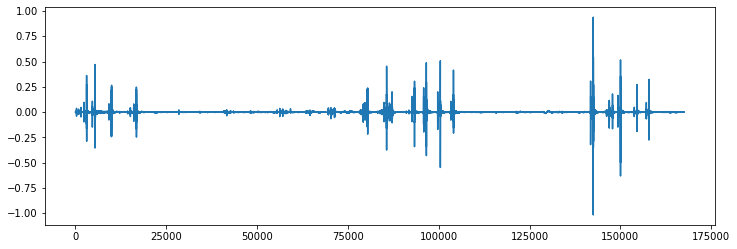

In [79]:
filename='datasets/eating_.wav'
print("File to be analyzed by the model: "+filename,"\n")
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

librosa_audio_data,librosa_sample_rate=librosa.load(filename)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

print("Extracted spectral feature array: \n")
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=(model.predict(mfccs_scaled_features) > 0.5).astype("int32")
print("\nModel outcome Label: ", predicted_label)
if predicted_label[0][0] == 1: 
    final_behavior = "Drinking"
else: 
    final_behavior = "Eating"
print("\nFinal classified behavior: "+final_behavior)

In [34]:
filename='datasets/eating_3.wav'
print("File to be analyzed by the model: "+filename,"\n")
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

librosa_audio_data,librosa_sample_rate=librosa.load(filename)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

print("Extracted spectral feature array: \n")
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=(model.predict(mfccs_scaled_features) > 0.5).astype("int32")
print("\nModel outcome Label: ", predicted_label)
if predicted_label[0][0] == 1: 
    final_behavior = "Drinking"
else: 
    final_behavior = "Eating"
print("\nFinal classified behavior: "+final_behavior)

1